# Exploración de indicadores que reflejen la incidencia de Covid-19 en Venezuela usando fuentes de datos no oficiales

# Análisis general
___

En este cuaderno se explorarán las series de tiempo de los casos estimados por el IHME y se compararán con las series de los indicadores extraídos de: [GoFundMe](), [Google]() y [Twitter]().

___

## Configuración

Configurar el entorno importando las bibliotecas con las que se van trabajar.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
from synthetic_tests_lib import crosscorr

In [ ]:
Definir el estilo de las gráficas utilizando los siguientes `seaborn`.

In [3]:
# Para usar el estilo por defecto de seaborn
sns.set(rc={'figure.figsize':(11, 5)})
sns.set_style("white") #ponemos el fondo blanco

Cargamos las series de tiempo.

In [4]:
#GoFundMe
serie_GoFundMe = pd.read_csv('../datos/series_GoFundMe.csv', parse_dates = True, index_col = 0)
serie_GoFundMe = serie_GoFundMe.loc[:,'Medical, Illness & Healing']

#IHME
serie_IHME = pd.read_csv('../datos/series_IHME.csv', parse_dates = True, index_col = 0)
serie_IHME = serie_IHME.loc[:,'Daily new estimated infections of COVID-19 (IHME, mean)']

#Twitter
serie_Twitter = pd.read_csv('../datos/series_Twitter.csv', parse_dates = True, index_col = 0)

#Google
serie_google = pd.read_csv('../datos/series_Google.csv', parse_dates = True, index_col = 0)

Comparamos las estimaciones del IHME con el estimador obtenido a partir de los datos obtenidos de la página de GoFundMe: 

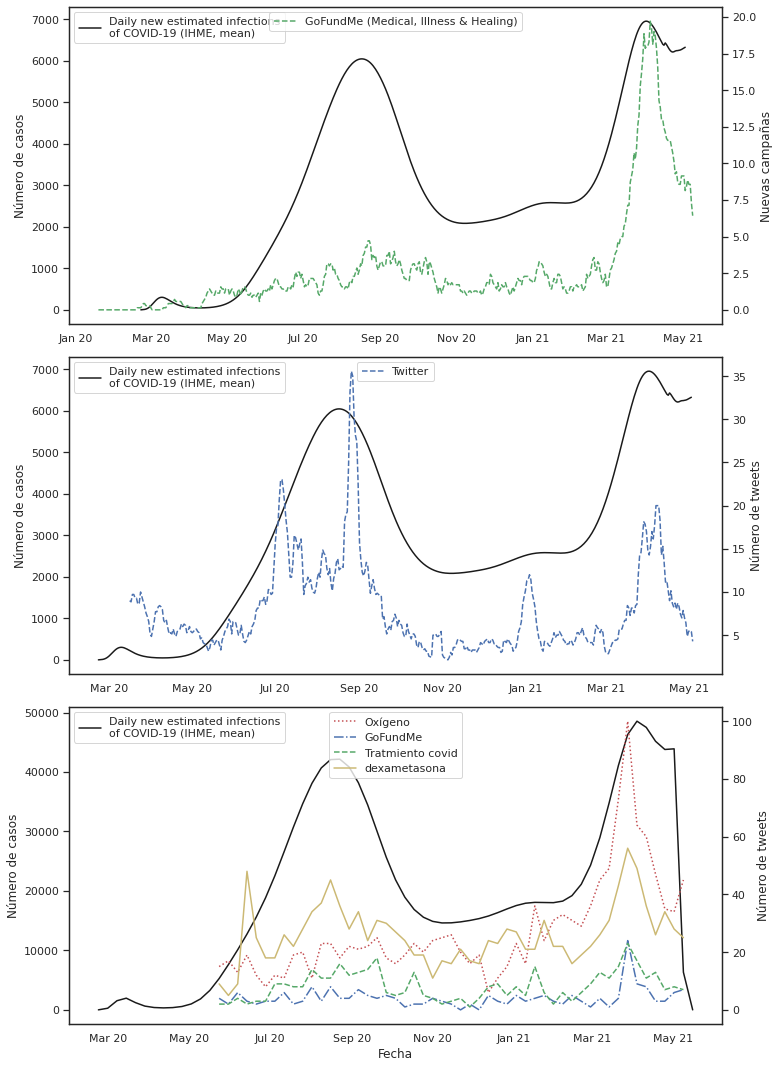

In [7]:
fig, axs = plt.subplots(3, 1, figsize = (11, 15))

# GoFundMe
ax_left = axs[0]
ax_right = ax_left.twinx() # creamos el eje gemelo a la derecha
ax_right.plot(serie_GoFundMe, label = 'GoFundMe (Medical, Illness & Healing)', ls = '--', color = 'g')
ax_left.plot(serie_IHME, label = 'Daily new estimated infections\nof COVID-19 (IHME, mean)', ls = '-', color = 'k')
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
ax_left.legend(loc = 'upper left')
ax_right.legend(loc = 'upper center' )
# nombre de los ejes
ax_right.set_ylabel('Nuevas campañas')
ax_left.set_ylabel('Número de casos')

# Twitter
ax_left = axs[1]
ax_right = ax_left.twinx() # creamos el eje gemelo a la derecha
ax_right.plot(serie_Twitter, label = 'Twitter', ls = '--', color = 'b')
ax_left.plot(serie_IHME, label = 'Daily new estimated infections\nof COVID-19 (IHME, mean)', ls = '-', color = 'k')
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
ax_left.legend(loc = 'upper left')
ax_right.legend(loc = 'upper center' )
# nombre de los ejes
ax_right.set_ylabel('Número de tweets')
ax_left.set_ylabel('Número de casos')

# google (¿semanas, no hay forma de hacerlo diario?)
ax_left = axs[2]
ax_right = ax_left.twinx() # creamos el eje gemelo a la derecha
ax_right.plot(serie_google.index, serie_google['oxigeno'], label = 'Oxígeno', ls = ':', color = 'r')
ax_right.plot(serie_google.index, serie_google['GoFundMe'], label = 'GoFundMe', ls = '-.', color = 'y')
ax_right.plot(serie_google.index, serie_google['tratamiento covid'], label = 'Tratmiento covid',ls = '--', color = 'g')
ax_right.plot(serie_google.index, serie_google['dexametasona'], label = 'dexametasona',ls = '-', color = 'b')
ax_left.plot(serie_IHME.resample('W').sum(), label = 'Daily new estimated infections\nof COVID-19 (IHME, mean)', 
                                          ls = '-', color = 'k')
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
ax_left.legend(loc = 'upper left')
ax_right.legend(loc = 'upper center' )
# nombre de los ejes
ax_right.set_ylabel('Número de tweets')
ax_left.set_ylabel('Número de casos')
axs[2].set_xlabel('Fecha')

plt.tight_layout()
plt.show()

In [8]:
# Time lagged cross correlation
def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 

    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag))

NameError: name 'signal' is not defined